In [87]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
directory = os.getcwd()
print(directory)

D:\ImageClassification\projects\mask_type


In [12]:
train_path='Dataset/train'
test_path='Dataset/test'
classes=['cloth','N95','N95V','NFM','SRG']

In [75]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(100,100),classes=classes,batch_size=10)
test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(100,100),classes=classes,batch_size=10, shuffle=False)

Found 1956 images belonging to 5 classes.
Found 330 images belonging to 5 classes.


In [68]:
#def prep_data(x):
#    x = tf.image.rgb_to_grayscale(x)
#    return x

#train_batch_test=ImageDataGenerator(preprocessing_function=prep_data).flow_from_directory(directory=train_path, target_size=(100,100),classes=classes,batch_size=10)
#test_batch_test=ImageDataGenerator(preprocessing_function=prep_data).flow_from_directory(directory=test_path, target_size=(100,100),classes=classes,batch_size=10, shuffle=False)

Found 1956 images belonging to 5 classes.
Found 330 images belonging to 5 classes.


In [82]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

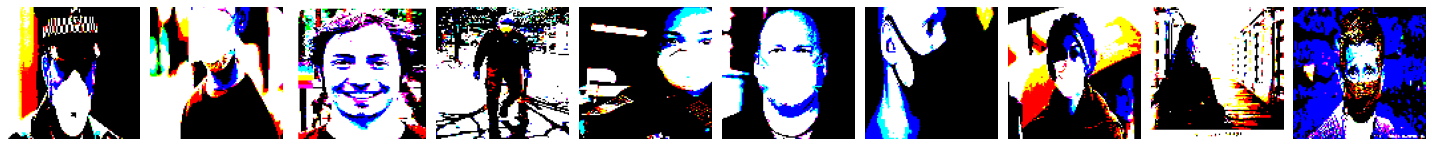

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [83]:
plotImages(imgs)
print(labels)

In [101]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=5, activation='sigmoid'))

model.compile(loss=tf.losses.BinaryCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 16)      

In [103]:
hist=model.fit(train_batch,epochs=5)

Epoch 1/10
196/196 [==============================] - 4s 22ms/step - loss: 0.2332 - accuracy: 0.7607
Epoch 2/10
196/196 [==============================] - 4s 22ms/step - loss: 0.1712 - accuracy: 0.8287
Epoch 3/10
196/196 [==============================] - 4s 22ms/step - loss: 0.1344 - accuracy: 0.8783
Epoch 4/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0946 - accuracy: 0.9177
Epoch 5/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0548 - accuracy: 0.9632
Epoch 6/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0505 - accuracy: 0.9663
Epoch 7/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0192 - accuracy: 0.9913
Epoch 8/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0814 - accuracy: 0.9402
Epoch 9/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0494 - accuracy: 0.9657
Epoch 10/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0327 - accura

In [104]:
model.predict(test_batch)

33/33 [==============================] - 1s 19ms/step


array([[4.5675807e-02, 2.2252931e-05, 9.7126579e-01, 2.5521707e-02,
        3.6510276e-06],
       [2.0653400e-01, 6.2870054e-06, 2.1323003e-09, 9.8335546e-01,
        3.8089263e-05],
       [9.9981099e-01, 1.9534207e-08, 1.5252951e-06, 5.1054446e-04,
        1.1328520e-12],
       ...,
       [2.3060420e-03, 3.5970127e-06, 1.3002513e-04, 4.3971758e-04,
        9.9941051e-01],
       [4.0096120e-06, 4.5142897e-05, 2.0294750e-05, 6.3035605e-10,
        9.9952424e-01],
       [1.2452591e-06, 2.7443392e-08, 7.1694281e-05, 3.4650578e-11,
        9.9996865e-01]], dtype=float32)